In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chronic-kidney-disease-dataset-analysis/Chronic_Kidney_Dsease_data.csv


In [2]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('/kaggle/input/chronic-kidney-disease-dataset-analysis/Chronic_Kidney_Dsease_data.csv')
data.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

## Data Preprocessing

In [5]:
print(data.isnull().sum())
print('*****************************************************************************************')
print('Duplicated Data:',   data.duplicated().sum())

PatientID                        0
Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryKidneyDisease       0
FamilyHistoryHypertension        0
FamilyHistoryDiabetes            0
PreviousAcuteKidneyInjury        0
UrinaryTractInfections           0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
GFR                              0
ProteinInUrine                   0
ACR                              0
SerumElectrolytesSodium          0
SerumElectrolytesPotassium       0
SerumElectrolytesCal

In [6]:
data['Diagnosis'].value_counts()

Diagnosis
1    1524
0     135
Name: count, dtype: int64

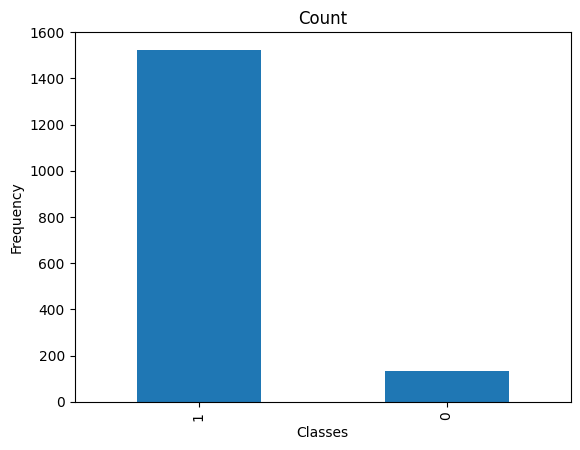

In [7]:
data['Diagnosis'].value_counts().plot(kind = 'bar')
plt.title('Count')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

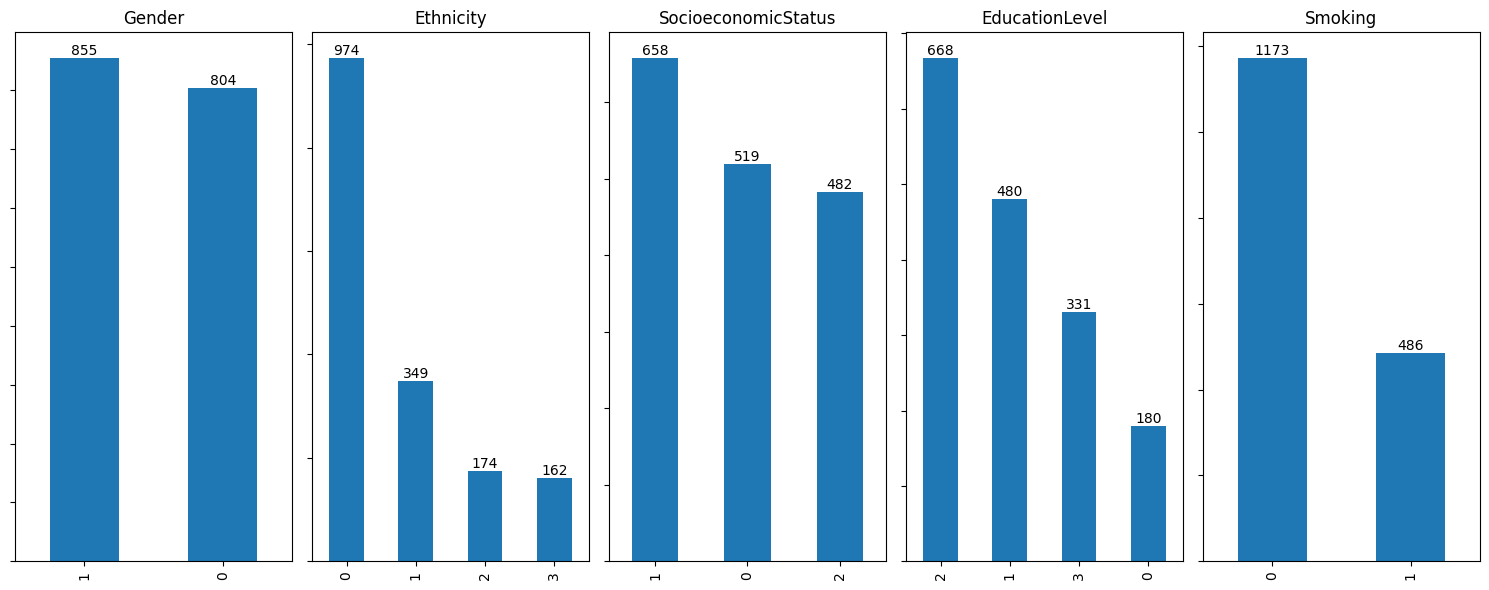

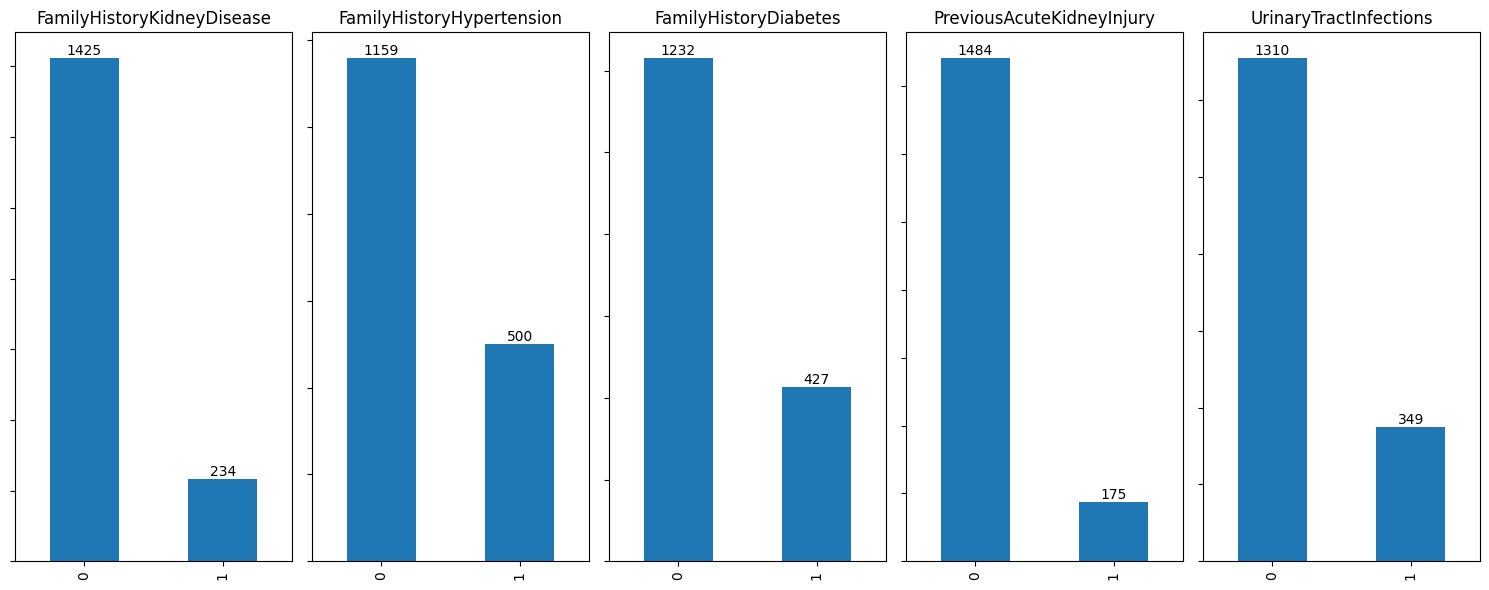

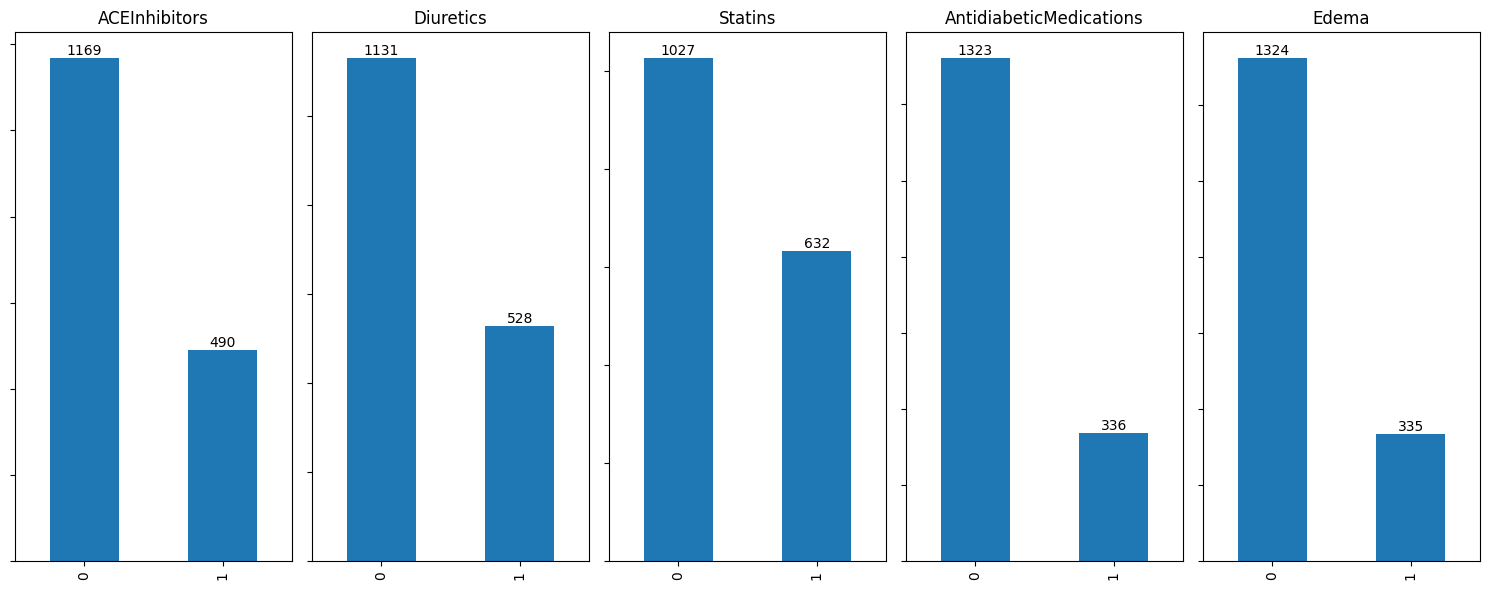

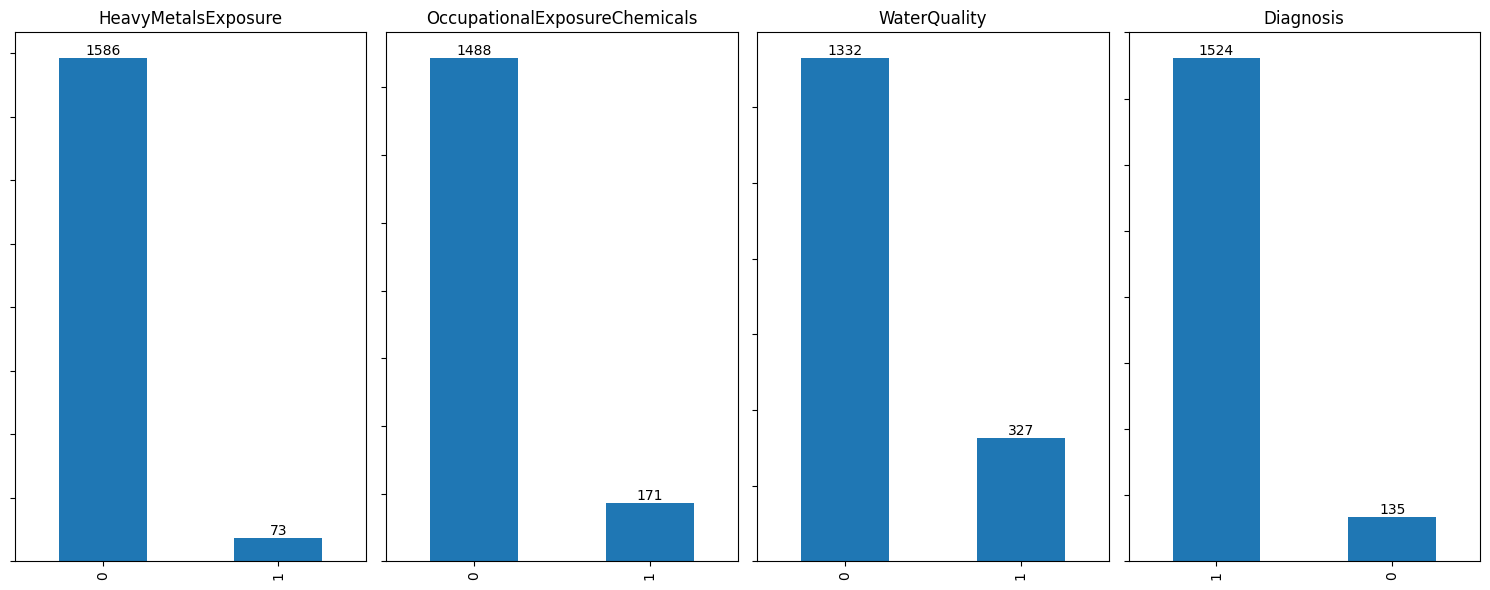

In [8]:
cats = [i for i in data.columns if data[i].nunique() < 5]
index = 0
for i in range(3):
    fig, axes = plt.subplots(ncols=5, figsize=(15, 6))
    for j in range(5):
        count = data[cats[index]].value_counts()
        count.plot(kind="bar", ax=axes[j])
        for container in axes[j].containers:
            axes[j].bar_label(container)
        axes[j].set_yticklabels(())
        axes[j].set_ylabel("")
        axes[j].set_xlabel("")
        axes[j].set_title(cats[index])
        index += 1
    plt.tight_layout()
    plt.show()
    
fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
for j in range(4):
    count = data[cats[index]].value_counts()
    count.plot(kind="bar", ax=axes[j])
    for container in axes[j].containers:
        axes[j].bar_label(container)
    axes[j].set_yticklabels(())
    axes[j].set_ylabel("")
    axes[j].set_xlabel("")
    axes[j].set_title(cats[index])
    index += 1
plt.tight_layout()
plt.show()

## Dropping the unwanted features

In [9]:
data.drop(['PatientID', 'DoctorInCharge'], axis=1,inplace = True)

In [10]:
data.head()

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,...,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1
1,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,...,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1
2,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,...,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1
3,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,...,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1
4,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,...,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1


## Checking Skewness of the data

In [11]:
data.skew()

Age                              0.003152
Gender                          -0.061568
Ethnicity                        1.184191
SocioeconomicStatus              0.038585
EducationLevel                  -0.220439
BMI                             -0.041887
Smoking                          0.910715
AlcoholConsumption              -0.010258
PhysicalActivity                 0.006964
DietQuality                      0.023528
SleepQuality                     0.052256
FamilyHistoryKidneyDisease       2.064379
FamilyHistoryHypertension        0.866466
FamilyHistoryDiabetes            1.110886
PreviousAcuteKidneyInjury        2.570968
UrinaryTractInfections           1.422551
SystolicBP                       0.031465
DiastolicBP                      0.011416
FastingBloodSugar                0.081009
HbA1c                            0.009469
SerumCreatinine                  0.010361
BUNLevels                       -0.007497
GFR                              0.015337
ProteinInUrine                   0

## Correlation Matrix

<Axes: >

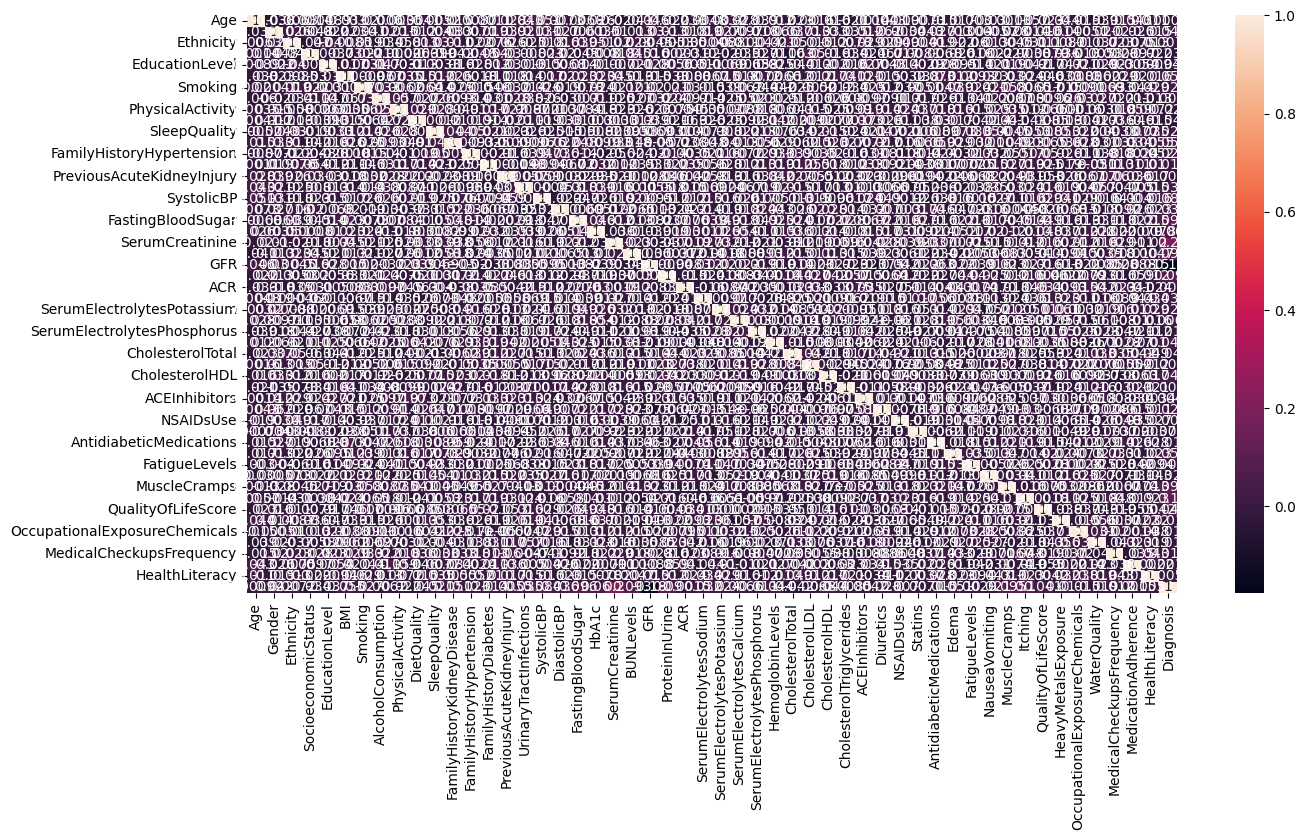

In [12]:
plt.figure(figsize = (15,7.5))
sns.heatmap(data.corr(), annot = True)

## Using SMOTE to handle Imbalanced data and using Standard Scalar to normalize

In [13]:
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Model training 

We shall use many Algorithms to train our data.

# Logistic Regression

In [14]:
lr_params = {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
lr = LogisticRegression(random_state=42)
lr_grid = GridSearchCV(lr, lr_params, cv=5)
lr_grid.fit(X_train, y_train)
y_pred_lr = lr_grid.predict(X_test)
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       297
           1       0.90      0.81      0.85       313

    accuracy                           0.85       610
   macro avg       0.86      0.86      0.85       610
weighted avg       0.86      0.85      0.85       610



# XGBoost

In [15]:
xgb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
xgb = XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5)
xgb_grid.fit(X_train, y_train)
y_pred_xgb = xgb_grid.predict(X_test)
print("XGBoost Classification Report")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       297
           1       0.98      0.97      0.97       313

    accuracy                           0.97       610
   macro avg       0.97      0.97      0.97       610
weighted avg       0.97      0.97      0.97       610



## Decision Trees

In [16]:
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30]}
dt = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt, dt_params, cv=5)
dt_grid.fit(X_train, y_train)
y_pred_dt = dt_grid.predict(X_test)
print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       297
           1       0.94      0.83      0.88       313

    accuracy                           0.88       610
   macro avg       0.89      0.88      0.88       610
weighted avg       0.89      0.88      0.88       610



## Random Forest 

In [17]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       297
           1       0.99      0.98      0.98       313

    accuracy                           0.98       610
   macro avg       0.98      0.98      0.98       610
weighted avg       0.98      0.98      0.98       610



## SVM

In [18]:
svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
svm = SVC(random_state=42)
svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(X_train, y_train)
y_pred_svm = svm_grid.predict(X_test)
print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       297
           1       1.00      0.98      0.99       313

    accuracy                           0.99       610
   macro avg       0.99      0.99      0.99       610
weighted avg       0.99      0.99      0.99       610

